
--- Combined Model Results ---
Combined Model - Mean Squared Error: 232777365.17312637
Combined Model - R^2 Score: 0.5484757923778818


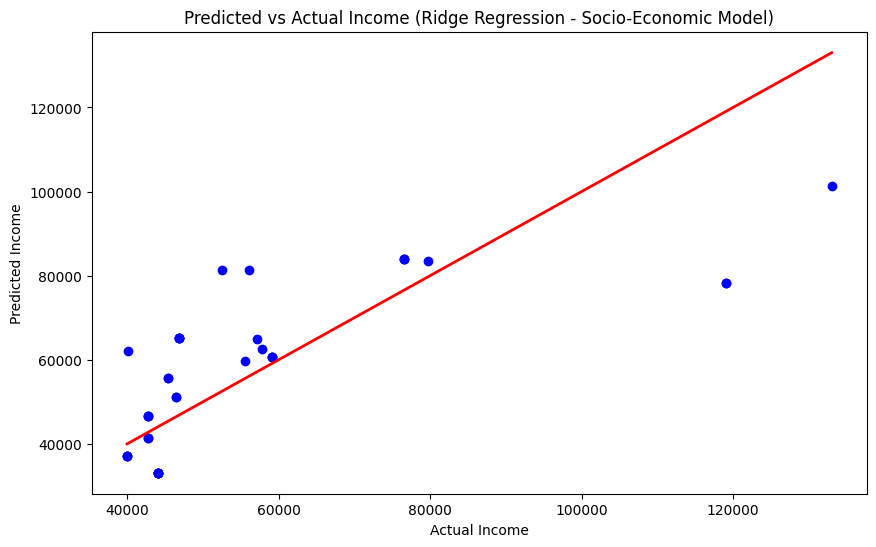

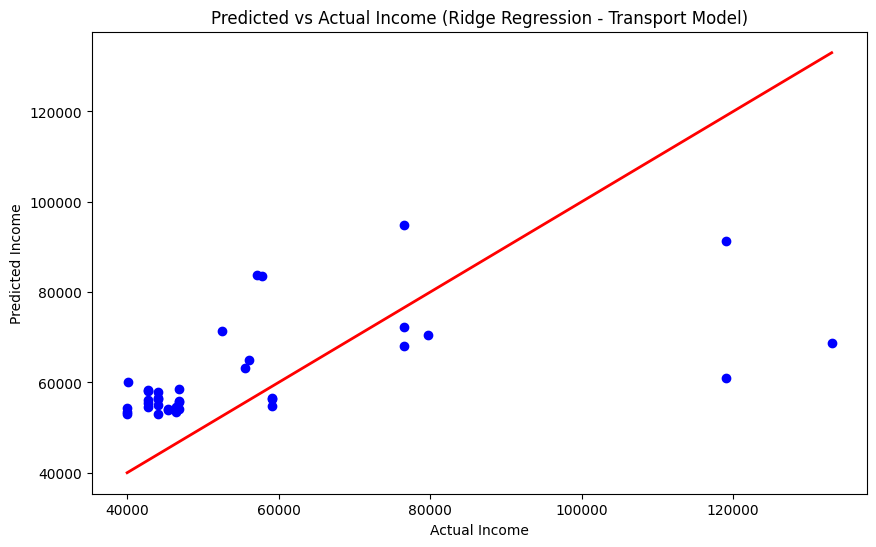

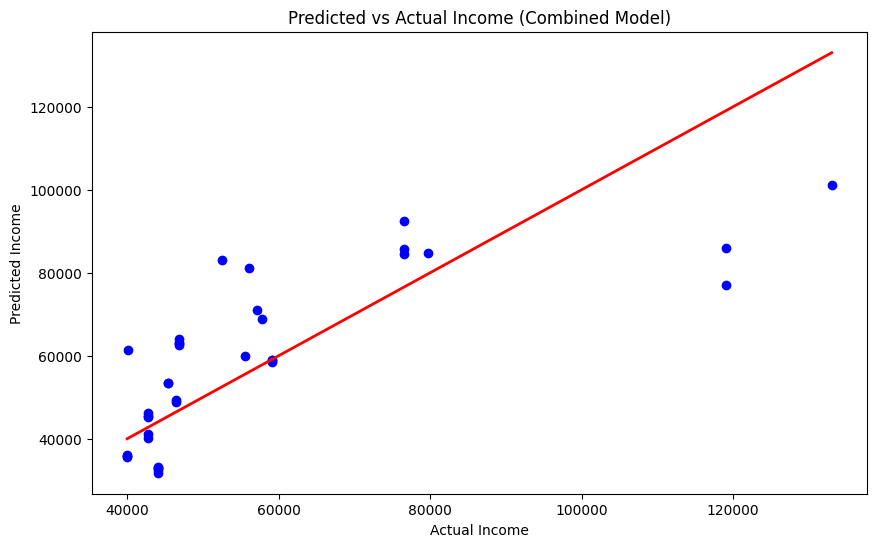

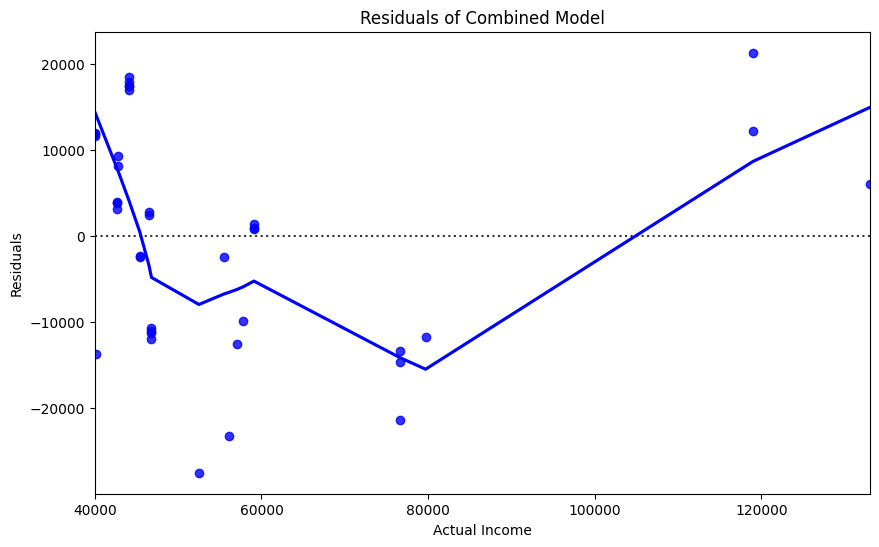

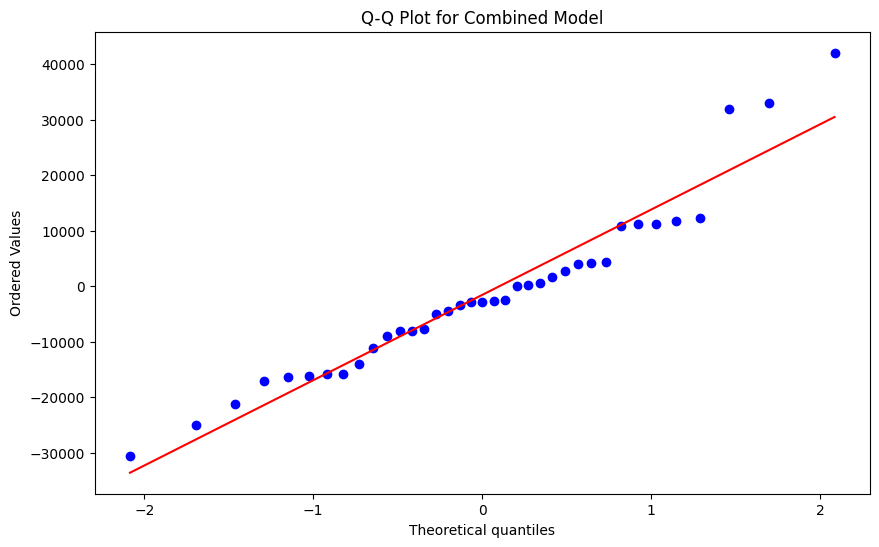


--- Model Results Summary ---

Ridge Regression Model (Socio-Economic):
Cross-Validation Mean Squared Error (Ridge): 315887897.7506725
Cross-Validation R^2 Score (Ridge): 0.5629876571405055
Ridge Regression - Mean Squared Error: 239500007.21046618
Ridge Regression - R^2 Score: 0.5354357117120515
Ridge Regression - Coefficients: [ -1112.73146495 -10270.344756     4891.04774068  13981.82030568]
Ridge Regression - Intercept: 61676.754382522035

Ridge Regression Model (Transport):
Cross-Validation Mean Squared Error (Ridge2): 624557455.0365436
Cross-Validation R^2 Score (Ridge2): 0.15023561724154982
Ridge Regression - Mean Squared Error (Ridge2): 375408532.38283813
Ridge Regression - R^2 Score (Ridge2): 0.2718104700915638
Ridge Regression - Coefficients (Ridge2): [10851.53374205]
Ridge Regression - Intercept (Ridge2): 62344.31162390083

Combined Model:
Combined Model - Mean Squared Error: 232777365.17312637
Combined Model - R^2 Score: 0.5484757923778818
Combined Model - Coefficients: [0.9

In [1]:
#Normalised Combined Income Model (Ridge and Lasso).

import pandas as pd  #imports pandas library for data manipulation
import numpy as np  #imports numpy library for numerical computations
from sklearn.model_selection import train_test_split, cross_val_score, KFold  #imports functions for model evaluation
from sklearn.linear_model import Ridge  #imports Ridge regression model
from sklearn.linear_model import Lasso #lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  #imports model evaluation metrics
from sklearn.preprocessing import StandardScaler  #imports StandardScaler for feature normalisation
import matplotlib.pyplot as plt  #imports matplotlib for plotting
import seaborn as sns  #imports seaborn for data visualisation
import scipy.stats as stats  #imports scipy for statistical analysis

#Loads the socio-economic dataset
file_path_income = r'C:\Users\alexs\Documents\Masters\Project\Code\EDA\Income Data.xlsx' #CHANGE TO YOUR OWN FILEPATH IF YOU WOULD LIKE TO RUN CODE
df_income = pd.read_excel(file_path_income) #reads excel file into dataframe

#Renames columns for clarity
df_income.columns = ['Code', 'Borough_Name', 'Income', 'Percentage_with_degree', 'English_Spoken_at_Home', 'White', 'Asian', 'Black', 'Mixed_Other', 'GCSE_Level_8_total', 'GCSE_FSM']

#Ensures all relevant columns are numeric
df_income['Income'] = pd.to_numeric(df_income['Income'], errors='coerce')  
df_income['Percentage_with_degree'] = pd.to_numeric(df_income['Percentage_with_degree'], errors='coerce')
df_income['English_Spoken_at_Home'] = pd.to_numeric(df_income['English_Spoken_at_Home'], errors='coerce')
df_income['Asian'] = pd.to_numeric(df_income['Asian'], errors='coerce')
df_income['Black'] = pd.to_numeric(df_income['Black'], errors='coerce')
df_income['Mixed_Other'] = pd.to_numeric(df_income['Mixed_Other'], errors='coerce')
df_income['GCSE_Level_8_total'] = pd.to_numeric(df_income['GCSE_Level_8_total'], errors='coerce')
df_income['GCSE_FSM'] = pd.to_numeric(df_income['GCSE_FSM'], errors='coerce')

#Combines ethnicity columns into one category 'Minority'
df_income['Minority'] = df_income['Asian'] + df_income['Black'] + df_income['Mixed_Other']
df_income = df_income.drop(columns=['Asian', 'Black', 'Mixed_Other', 'White'])

#Drops rows with any NaN values
df_income = df_income.dropna()

#Toggles to include/exclude "Kensington and Chelsea"
include_kensington = False  #change to True if Chelsea shoule included
if not include_kensington:
    df_income = df_income[df_income['Borough_Name'] != 'Kensington and Chelsea']

#Loads the accessibility data
file_path_accessibility = r'C:\Users\alexs\Documents\Masters\Project\Code\EDA\Transportation\merged_accessibility_scores_with_adjusted_normalized.csv'
accessibility_data = pd.read_csv(file_path_accessibility)

#Ensures borough names match between datasets
df_income['Borough_Name'] = df_income['Borough_Name'].str.strip()
accessibility_data['Borough'] = accessibility_data['Borough'].str.strip()

#Merges accessibility data with income data
merged_data = pd.merge(accessibility_data, df_income, left_on='Borough', right_on='Borough_Name', how='inner')

#Drops rows with any NaN values in the merged dataset
merged_data = merged_data.dropna(subset=['Normalized_Adjusted_Accessibility_Score', 'Income'])

#Prepares the data for the Ridge regression model
X_ridge = merged_data[['English_Spoken_at_Home', 'Minority', 'GCSE_FSM', 'Percentage_with_degree']]
y_ridge = merged_data['Income']

#Prepares the data for the second Ridge regression model (transport model)
X_ridge2 = merged_data[['Normalized_Adjusted_Accessibility_Score']]
y_ridge2 = merged_data['Income']

#Splits data into training and testing sets for the first Ridge model
X_ridge_train, X_ridge_test, y_ridge_train, y_ridge_test = train_test_split(X_ridge, y_ridge, test_size=0.2, random_state=42)

#Splits data into training and testing sets for the second Ridge model (transport model)
X_ridge2_train, X_ridge2_test, y_ridge2_train, y_ridge2_test = train_test_split(X_ridge2, y_ridge2, test_size=0.2, random_state=42)

#Normalising features
scaler = StandardScaler()
X_ridge_normalized = scaler.fit_transform(X_ridge)  #normalises first Ridge model features
X_ridge2_normalized = scaler.fit_transform(X_ridge2)  #normalises second Ridge model features

#Splitting the normalised data
X_ridge_train, X_ridge_test, y_ridge_train, y_ridge_test = train_test_split(X_ridge_normalized, y_ridge, test_size=0.2, random_state=42)  #splits first Ridge model data
X_ridge2_train, X_ridge2_test, y_ridge2_train, y_ridge2_test = train_test_split(X_ridge2_normalized, y_ridge2, test_size=0.2, random_state=42)  #splits second Ridge model data

#TO SEE LASSO REGRESSION RESULTS, COMMENT OUT THE CODE BELOW UNTIL YOU REACH THE COMMENTED CODE USING "CTRL /" TO DO IT ALL AT ONCE.
#THEN UNCOMMENT LASSO REGRESSION CODE (CURRENTLY COMMENTED OUT)

#Initialises and trains the first Ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_ridge_train, y_ridge_train)  #fits the first Ridge model

#Performs k-fold cross-validation for the first Ridge regression model
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_mse_scores_ridge = cross_val_score(ridge_model, X_ridge_normalized, y_ridge, cv=kf, scoring='neg_mean_squared_error')  #calculates cross-validation MSE scores
cv_r2_scores_ridge = cross_val_score(ridge_model, X_ridge_normalized, y_ridge, cv=kf, scoring='r2')  #calculates cross-validation R^2 scores

#Fits the first Ridge model and makes predictions
ridge_model.fit(X_ridge_train, y_ridge_train)  #fits the model again
y_pred_ridge = ridge_model.predict(X_ridge_test)  #predicts using the first Ridge model

#Evaluates the first Ridge model
mse_ridge = mean_squared_error(y_ridge_test, y_pred_ridge)  #calculates MSE
r2_ridge = r2_score(y_ridge_test, y_pred_ridge)  #calculates R^2

#Initialises and trains the second Ridge regression model (transport model)
ridge_model2 = Ridge(alpha=1.0)
ridge_model2.fit(X_ridge2_train, y_ridge2_train)  #fits the second Ridge model

#Performs k-fold cross-validation for the second Ridge regression model (transport model)
cv_mse_scores_ridge2 = cross_val_score(ridge_model2, X_ridge2_normalized, y_ridge2, cv=kf, scoring='neg_mean_squared_error')  #calculates cross-validation MSE scores
cv_r2_scores_ridge2 = cross_val_score(ridge_model2, X_ridge2_normalized, y_ridge2, cv=kf, scoring='r2')  #calculates cross-validation R^2 scores

#Fits the second Ridge model (transport model) and makes predictions
y_pred_ridge2 = ridge_model2.predict(X_ridge2_test)  #predicts using the second Ridge model

#Evaluates the second Ridge model (transport model)
mse_ridge2 = mean_squared_error(y_ridge2_test, y_pred_ridge2)  #calculates MSE
r2_ridge2 = r2_score(y_ridge2_test, y_pred_ridge2)  #calculates R^2

#Combines predictions from both models
ridge_predictions = ridge_model.predict(X_ridge_normalized)  #predicts using the first Ridge model
ridge2_predictions = ridge_model2.predict(X_ridge2_normalized)  #predicts using the second Ridge model
X_combined = np.column_stack((ridge_predictions, ridge2_predictions))  #combines predictions

#Trains meta-model
meta_model = Ridge(alpha=1.0)
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y_ridge, test_size=0.2, random_state=42)  #splits combined data
meta_model.fit(X_train_combined, y_train_combined)  #fits the meta-model
y_pred_meta = meta_model.predict(X_test_combined)  #predicts using the meta-model

#Evaluates the combined model
mse_meta = mean_squared_error(y_test_combined, y_pred_meta)  #calculates MSE
r2_meta = r2_score(y_test_combined, y_pred_meta)  #calculates R^2

#Combined Model Results
print("\n--- Combined Model Results ---")
print(f'Combined Model - Mean Squared Error: {mse_meta}')  #prints combined model MSE
print(f'Combined Model - R^2 Score: {r2_meta}')  #prints combined model R^2

#Plots Ridge Regression results (socio-economic model)
plt.figure(figsize=(10, 6))
plt.scatter(y_ridge_test, y_pred_ridge, color='blue')  #plots actual vs predicted income
plt.plot([y_ridge_test.min(), y_ridge_test.max()], [y_ridge_test.min(), y_ridge_test.max()], color='red', linewidth=2)  #plots 45-degree reference line
plt.title('Predicted vs Actual Income (Ridge Regression - Socio-Economic Model)')
plt.xlabel('Actual Income')
plt.ylabel('Predicted Income')
plt.show()

#Plots Ridge Regression results (transport model)
plt.figure(figsize=(10, 6))
plt.scatter(y_ridge2_test, y_pred_ridge2, color='blue')  #plots actual vs predicted income
plt.plot([y_ridge2_test.min(), y_ridge2_test.max()], [y_ridge2_test.min(), y_ridge2_test.max()], color='red', linewidth=2)  #plots 45-degree reference line
plt.title('Predicted vs Actual Income (Ridge Regression - Transport Model)')
plt.xlabel('Actual Income')
plt.ylabel('Predicted Income')
plt.show()

#Plots Combined Model results
plt.figure(figsize=(10, 6))
plt.scatter(y_test_combined, y_pred_meta, color='blue')  #plots actual vs predicted income
plt.plot([y_test_combined.min(), y_test_combined.max()], [y_test_combined.min(), y_test_combined.max()], color='red', linewidth=2)  #plots 45-degree reference line
plt.title('Predicted vs Actual Income (Combined Model)')
plt.xlabel('Actual Income')
plt.ylabel('Predicted Income')
plt.show()

#Plots residuals for Combined Model
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test_combined, y=y_test_combined - y_pred_meta, lowess=True, color='blue')  #plots residuals
plt.title('Residuals of Combined Model')
plt.xlabel('Actual Income')
plt.ylabel('Residuals')
plt.show()

#Plots Q-Q plot for Combined Model
plt.figure(figsize=(10, 6))
stats.probplot(y_test_combined - y_pred_meta, dist="norm", plot=plt)  #plots Q-Q plot
plt.title('Q-Q Plot for Combined Model')
plt.show()

#Displays results summary
print("\n--- Model Results Summary ---")
print("\nRidge Regression Model (Socio-Economic):")
print(f'Cross-Validation Mean Squared Error (Ridge): {-cv_mse_scores_ridge.mean()}')  #prints cross-validation MSE for socio-economic model
print(f'Cross-Validation R^2 Score (Ridge): {cv_r2_scores_ridge.mean()}')  #prints cross-validation R^2 for socio-economic model
print(f'Ridge Regression - Mean Squared Error: {mse_ridge}')  #prints MSE for socio-economic model
print(f'Ridge Regression - R^2 Score: {r2_ridge}')  #prints R^2 for socio-economic model
print(f'Ridge Regression - Coefficients: {ridge_model.coef_}')  #prints coefficients for socio-economic model
print(f'Ridge Regression - Intercept: {ridge_model.intercept_}')  #prints intercept for socio-economic model

print("\nRidge Regression Model (Transport):")
print(f'Cross-Validation Mean Squared Error (Ridge2): {-cv_mse_scores_ridge2.mean()}')  #prints cross-validation MSE for transport model
print(f'Cross-Validation R^2 Score (Ridge2): {cv_r2_scores_ridge2.mean()}')  #prints cross-validation R^2 for transport model
print(f'Ridge Regression - Mean Squared Error (Ridge2): {mse_ridge2}')  #prints MSE for transport model
print(f'Ridge Regression - R^2 Score (Ridge2): {r2_ridge2}')  #prints R^2 for transport model
print(f'Ridge Regression - Coefficients (Ridge2): {ridge_model2.coef_}')  #prints coefficients for transport model
print(f'Ridge Regression - Intercept (Ridge2): {ridge_model2.intercept_}')  #prints intercept for transport model

print("\nCombined Model:")
print(f'Combined Model - Mean Squared Error: {mse_meta}')  #prints combined model MSE
print(f'Combined Model - R^2 Score: {r2_meta}')  #prints combined model R^2
print(f'Combined Model - Coefficients: {meta_model.coef_}')  #prints coefficients for combined model
print(f'Combined Model - Intercept: {meta_model.intercept_}')  #prints intercept for combined model

#AGAIN, UNCOMMENT CODE BELOW AND COMMENT OUT CODE ABOVE TO SEE LASSO MODEL RESULTS

# # Initialises and trains the first Lasso regression model
# lasso_model = Lasso(alpha=0.1)
# lasso_model.fit(X_ridge_train, y_ridge_train)  # fits the first Lasso model

# # Performs k-fold cross-validation for the first Lasso regression model
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
# cv_mse_scores_lasso = cross_val_score(lasso_model, X_ridge_normalized, y_ridge, cv=kf, scoring='neg_mean_squared_error')  # calculates cross-validation MSE scores
# cv_r2_scores_lasso = cross_val_score(lasso_model, X_ridge_normalized, y_ridge, cv=kf, scoring='r2')  # calculates cross-validation R^2 scores

# # Fits the first Lasso model and makes predictions
# lasso_model.fit(X_ridge_train, y_ridge_train)  # fits the model again
# y_pred_lasso = lasso_model.predict(X_ridge_test)  # predicts using the first Lasso model

# # Evaluates the first Lasso model
# mse_lasso = mean_squared_error(y_ridge_test, y_pred_lasso)  # calculates MSE
# r2_lasso = r2_score(y_ridge_test, y_pred_lasso)  # calculates R^2

# # Initialises and trains the second Lasso regression model (transport model)
# lasso_model2 = Lasso(alpha=0.1)
# lasso_model2.fit(X_ridge2_train, y_ridge2_train)  # fits the second Lasso model

# # Performs k-fold cross-validation for the second Lasso regression model (transport model)
# cv_mse_scores_lasso2 = cross_val_score(lasso_model2, X_ridge2_normalized, y_ridge2, cv=kf, scoring='neg_mean_squared_error')  # calculates cross-validation MSE scores
# cv_r2_scores_lasso2 = cross_val_score(lasso_model2, X_ridge2_normalized, y_ridge2, cv=kf, scoring='r2')  # calculates cross-validation R^2 scores

# # Fits the second Lasso model (transport model) and makes predictions
# y_pred_lasso2 = lasso_model2.predict(X_ridge2_test)  # predicts using the second Lasso model

# # Evaluates the second Lasso model (transport model)
# mse_lasso2 = mean_squared_error(y_ridge2_test, y_pred_lasso2)  # calculates MSE
# r2_lasso2 = r2_score(y_ridge2_test, y_pred_lasso2)  # calculates R^2

# # Combines predictions from both models
# lasso_predictions = lasso_model.predict(X_ridge_normalized)  # predicts using the first Lasso model
# lasso2_predictions = lasso_model2.predict(X_ridge2_normalized)  # predicts using the second Lasso model
# X_combined = np.column_stack((lasso_predictions, lasso2_predictions))  # combines predictions

# # Trains meta-model
# meta_model = Lasso(alpha=0.1)
# X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y_ridge, test_size=0.2, random_state=42)  # splits combined data
# meta_model.fit(X_train_combined, y_train_combined)  # fits the meta-model
# y_pred_meta = meta_model.predict(X_test_combined)  # predicts using the meta-model

# # Evaluates the combined model
# mse_meta = mean_squared_error(y_test_combined, y_pred_meta)  # calculates MSE
# r2_meta = r2_score(y_test_combined, y_pred_meta)  # calculates R^2

# # Combined Model Results
# print("\n--- Combined Model Results ---")
# print(f'Combined Model - Mean Squared Error: {mse_meta}')  # prints combined model MSE
# print(f'Combined Model - R^2 Score: {r2_meta}')  # prints combined model R^2

# # Plots Lasso Regression results (socio-economic model)
# plt.figure(figsize=(10, 6))
# plt.scatter(y_ridge_test, y_pred_lasso, color='blue')  # plots actual vs predicted income
# plt.plot([y_ridge_test.min(), y_ridge_test.max()], [y_ridge_test.min(), y_ridge_test.max()], color='red', linewidth=2)  # plots 45-degree reference line
# plt.title('Predicted vs Actual Income (Lasso Regression - Socio-Economic Model)')
# plt.xlabel('Actual Income')
# plt.ylabel('Predicted Income')
# plt.show()

# # Plots Lasso Regression results (transport model)
# plt.figure(figsize=(10, 6))
# plt.scatter(y_ridge2_test, y_pred_lasso2, color='blue')  # plots actual vs predicted income
# plt.plot([y_ridge2_test.min(), y_ridge2_test.max()], [y_ridge2_test.min(), y_ridge2_test.max()], color='red', linewidth=2)  # plots 45-degree reference line
# plt.title('Predicted vs Actual Income (Lasso Regression - Transport Model)')
# plt.xlabel('Actual Income')
# plt.ylabel('Predicted Income')
# plt.show()

# # Plots Combined Model results
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test_combined, y_pred_meta, color='blue')  # plots actual vs predicted income
# plt.plot([y_test_combined.min(), y_test_combined.max()], [y_test_combined.min(), y_test_combined.max()], color='red', linewidth=2)  # plots 45-degree reference line
# plt.title('Predicted vs Actual Income (Combined Model)')
# plt.xlabel('Actual Income')
# plt.ylabel('Predicted Income')
# plt.show()

# # Plots residuals for Combined Model
# plt.figure(figsize=(10, 6))
# sns.residplot(x=y_test_combined, y=y_test_combined - y_pred_meta, lowess=True, color='blue')  # plots residuals
# plt.title('Residuals of Combined Model')
# plt.xlabel('Actual Income')
# plt.ylabel('Residuals')
# plt.show()

# # Plots Q-Q plot for Combined Model
# plt.figure(figsize=(10, 6))
# stats.probplot(y_test_combined - y_pred_meta, dist="norm", plot=plt)  # plots Q-Q plot
# plt.title('Q-Q Plot for Combined Model')
# plt.show()

# # Displays results summary
# print("\n--- Model Results Summary ---")
# print("\nLasso Regression Model (Socio-Economic):")
# print(f'Cross-Validation Mean Squared Error (Lasso): {-cv_mse_scores_lasso.mean()}')  # prints cross-validation MSE for socio-economic model
# print(f'Cross-Validation R^2 Score (Lasso): {cv_r2_scores_lasso.mean()}')  # prints cross-validation R^2 for socio-economic model
# print(f'Lasso Regression - Mean Squared Error: {mse_lasso}')  # prints MSE for socio-economic model
# print(f'Lasso Regression - R^2 Score: {r2_lasso}')  # prints R^2 for socio-economic model
# print(f'Lasso Regression - Coefficients: {lasso_model.coef_}')  # prints coefficients for socio-economic model
# print(f'Lasso Regression - Intercept: {lasso_model.intercept_}')

# print("\nLasso Regression Model (Transport):")
# print(f'Cross-Validation Mean Squared Error (Lasso2): {-cv_mse_scores_lasso2.mean()}')  # prints cross-validation MSE for transport model
# print(f'Cross-Validation R^2 Score (Lasso2): {cv_r2_scores_lasso2.mean()}')  # prints cross-validation R^2 for transport model
# print(f'Lasso Regression - Mean Squared Error (Lasso2): {mse_lasso2}')  # prints MSE for transport model
# print(f'Lasso Regression - R^2 Score (Lasso2): {r2_lasso2}')  # prints R^2 for transport model
# print(f'Lasso Regression - Coefficients (Lasso2): {lasso_model2.coef_}')  # prints coefficients for transport model
# print(f'Lasso Regression - Intercept (Lasso2): {lasso_model2.intercept_}')

# print("\nCombined Model:")
# print(f'Combined Model - Mean Squared Error: {mse_meta}')  # prints combined model MSE
# print(f'Combined Model - R^2 Score: {r2_meta}')  # prints combined model R^2
# print(f'Combined Model - Coefficients: {meta_model.coef_}')  # prints coefficients for combined model
# print(f'Combined Model - Intercept: {meta_model.intercept_}')

